In [8]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
mark_type_counts = pd.read_csv("./output/mark_type_counts_by_year.csv")

In [5]:
serv_opp_counts = pd.read_csv("./output/serv_opposed_percents.csv")

In [6]:
trade_opp_counts = pd.read_csv("./output/trade_opposed_percents.csv")

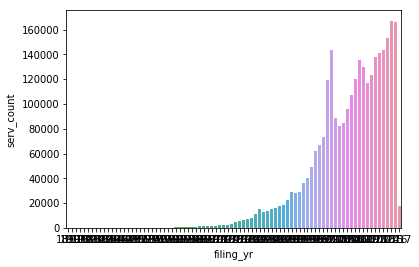

In [14]:
sns.barplot(data=mark_type_counts, x="filing_yr", y="serv_count")

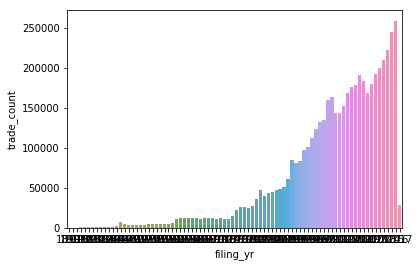

In [15]:
sns.barplot(data=mark_type_counts, x="filing_yr", y="trade_count")

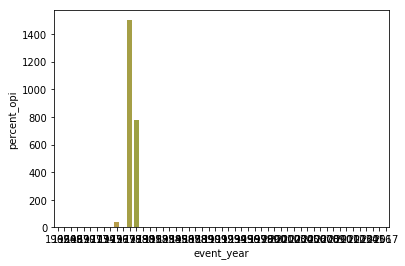

In [16]:
sns.barplot(data=serv_opp_counts, x="event_year", y="percent_opi")

In [23]:
cleaned_serv = serv_opp_counts[serv_opp_counts['percent_opi'] < 10]

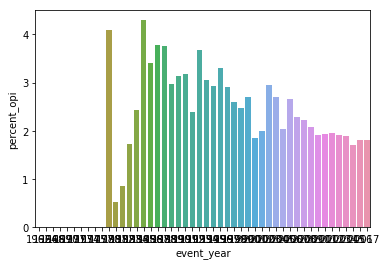

In [24]:
sns.barplot(data=cleaned_serv, x="event_year", y="percent_opi")